# Notebook 25: Mohr Circle for stress

Like the Mohr Circle for strain, the Mohr Circle for stress results from a rotation about one of the principal axis of the stress tensor. For a demonstration, see section 6.3.2 of [Allmendinger et al. (2012)](https://www.cambridge.org/core/books/structural-geology-algorithms/C5AB97C135925A5D49726B741738DCA9).

The equations for the Mohr Circle for stress are:

$$
\begin{gathered}
\sigma=\frac{\sigma_1+\sigma_3}{2}+\frac{\sigma_1-\sigma_3}{2} \cos 2 \theta \\
\tau=\frac{\sigma_1-\sigma_3}{2} \sin 2 \theta
\end{gathered}
$$

where $\sigma_1$ and $\sigma_3$ are the maximum and minimum principal stresses, $\theta$ is the angle between $\sigma_1$ and the normal to the plane, and $\sigma$ and $\tau$ are the normal and shear tractions on the plane. 

The figure below shows the relationship between the physical space (the gray block of rock with the plane P) and the Mohr Circle for stress. Note that the angle $\theta$ between $\sigma_1$ and the normal to the plane, is marked as $2\theta$ in the Mohr Circle. Also $+\tau$ is anti-clockwise and $-\tau$ clockwise shear.

<img src="../figures/mohr_circle_stress.png" alt="mohr_circle_stress" width="500" style="display: block; margin: 0 auto"/><br><br>

Thus, the Mohr Circle for stress is a graphical calculator that allow us to determine the normal and shear tractions on any plane which is parallel to one of the principal stresses and can make any angle with respect to the other two principal stresses.

## Python code

We'll use the class [Circle](../functions/Circle.py), which contains handy functions to draw the Mohr Circle.

## Applications

Let's solve first this problem from [Ragan (2009)](https://www.cambridge.org/core/books/structural-geology/4D631885C9FBBCDEF90C555445ED1160#): If $\sigma_1$ 150 MPa, and $\sigma_3$ is 50 MPa, what are the tractions on a plane whose normal makes an angle theta of 34° with $\sigma_1$?

<img src="../figures/mcs_problem_1.png" alt="mcs_problem_1" width="300" style="display: block; margin: 0 auto"/><br><br>

Normal traction = 119, shear traction = 46 MPa


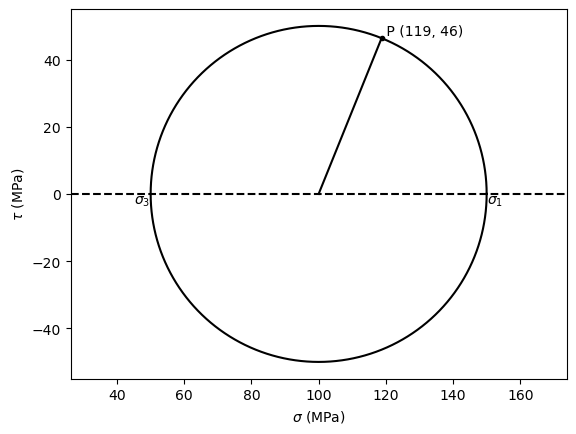

In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt

# this makes visible our functions folder
sys.path.append(os.path.abspath(os.path.join("..", "functions")))

# import class Circle
from Circle import Circle

# sigma_1, sigma_3 and theta
sigma_1 = 150
sigma_3 = 50
theta = np.radians(34)

# Mohr Circle
center_x = (sigma_1 + sigma_3) / 2
radius = (sigma_1 - sigma_3) / 2
circle = Circle([center_x, 0], radius)
x, y = circle.coordinates()

# tractions on plane
p = circle.coordinates_at_angle(2*theta)
print(f"Normal traction = {p[0]:.0f}, shear traction = {p[1]:.0f} MPa")

# plot Mohr Circle
fig, ax = plt.subplots()
ax.plot(x, y, "k")
ax.text(center_x-radius, 0, r"$\sigma_3$", ha="right", va="top")
ax.text(center_x+radius, 0, r"$\sigma_1$", ha="left", va="top")
ax.plot([center_x, p[0]], [0, p[1]], "k-")
ax.plot(p[0], p[1], "k.")
ax.text(p[0], p[1], f" P ({p[0]:.0f}, {p[1]:.0f})", ha="left", va="bottom")
ax.axhline(0,color="k",linestyle="--")
# axes labels
ax.set_xlabel(r"$\sigma$ (MPa)")
ax.set_ylabel(r"$\tau$ (MPa)")
# axes equal
ax.axis("equal")

plt.show()

Now let's do another exercise also from [Ragan (2009)](https://www.cambridge.org/core/books/structural-geology/4D631885C9FBBCDEF90C555445ED1160#): Determine the values of $\sigma_1$ and $\sigma_3$, and their orientations from the stress components below:

<img src="../figures/mcs_problem_2.png" alt="mcs_problem_2" width="300" style="display: block; margin: 0 auto"/><br><br>

This problem can be solved analytically, but we'll use a more graphical approach. Namely, we will use a special point in the Mohr Circle called the pole for normals, ON ([Ragan, 2009](https://www.cambridge.org/core/books/structural-geology/4D631885C9FBBCDEF90C555445ED1160#)): *A line through ON and any point P on the circumference of the Mohr Circle is parallel to the normal of the plane on which the components of the traction given by the coordinates of P act*. Therefore, to find ON, we just need to trace the normals to the sides of the cube Px and Py from the points Px and Py in the Mohr Circle. These lines will intersect at ON. Then, to find the directions of $\sigma_1$ and $\sigma_3$, we just need to trace lines from ON to $\sigma_1$ and $\sigma_3$ (red lines in the figure below).

sigma_1 = 358, sigma_3 = 102 MPa


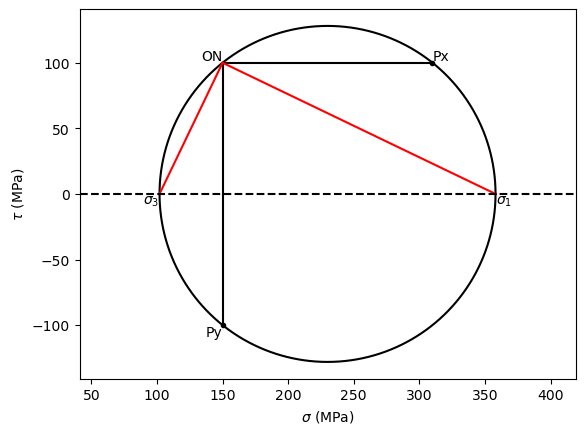

In [2]:
# tractions
sxx = 310
sxy = 100 # anticlockwise shear is positive
syy = 150
syx = -100 # clockwise shear is negative

# Mohr Circle
circle = Circle([0,0], 1)
points = np.array([[sxx,sxy],[syy,syx],[syy,sxy]])
circle.fit_three_points(points)
x,y = circle.coordinates()

# find the pole to normals (Ragan, 2009)
pole = circle.chord_endpoint([sxx,sxy], np.radians(180)) 
chord_px = np.array([[sxx,sxy], pole])
pole = circle.chord_endpoint([syy,syx], np.radians(90))
chord_py = np.array([[syy,syx], pole])
# sigma1 and sigma3 values
sigma_1 = circle.center[0] + circle.radius
sigma_3 = circle.center[0] - circle.radius
print(f"sigma_1 = {sigma_1:.0f}, sigma_3 = {sigma_3:.0f} MPa")
# sigma1 and sigma3 directions
pr_dir = np.array([pole, [sigma_1, 0], pole, [sigma_3, 0]])

# plot Mohr Circle
fig, ax = plt.subplots()
# circle
ax.plot(x, y, "k")
# sigma_1 and sigma_3 labels
ax.text(sigma_1, 0, r"$\sigma_1$", ha="left", va="top")
ax.text(sigma_3, 0, r"$\sigma_3$", ha="right", va="top")
# planes
ax.plot(sxx, sxy, "k.")
ax.text(sxx, sxy, "Px", ha="left", va="bottom")
ax.plot(syy, syx, "k.")
ax.text(syy, syx, "Py", ha="right", va="top")
# normals to planes
ax.plot(chord_px[:,0],chord_px[:,1],"k-")
ax.plot(chord_py[:,0],chord_py[:,1],"k-")
# pole of normals
ax.text(pole[0],pole[1],"ON", ha="right", va="bottom")
# sigma 1 and sigma 3 directions
for i in range(0, 4, 2):
    ax.plot(pr_dir[i:i+2,0],pr_dir[i:i+2,1],"r-")
# horizontal line at tau = 0
ax.axhline(0,color="k",linestyle="--")
# axes labels
ax.set_xlabel(r"$\sigma$ (MPa)")
ax.set_ylabel(r"$\tau$ (MPa)")
# axes equal
ax.axis("equal")

plt.show()

What about if we instead want to determine the tractions acting on the plane P above? Again, this can be done analytically or graphically. We opt for the second choice. We will use a special point in the Mohr Circle called the pole for planes, OP ([Ragan, 2009](https://www.cambridge.org/core/books/structural-geology/4D631885C9FBBCDEF90C555445ED1160#)): *A line through OP and any point P on the circumference of the Mohr Circle is parallel to the trace of the plane on which the traction components given by the coordinates of P act*. Therefore, to find OP, we just need to trace lines parallel to the planes Px and Py from the points Px and Py in the Mohr Circle. These lines will intersect at OP. Then, to find the tractions on the plane P, we just need to trace from OP a line parallel to the plane P. This line will intersect the other side of the circle at a point P with coordinates equal to the tractions on the plane.

Normal traction = 130, shear traction = 80 MPa


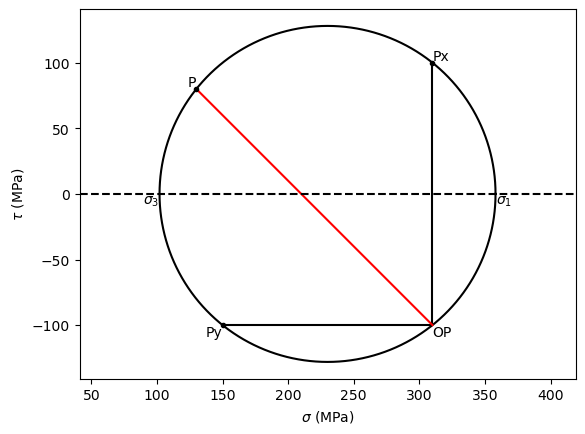

In [3]:
# find the pole to planes (Ragan, 2009)
pole = circle.chord_endpoint([sxx,sxy], np.radians(270)) 
chord_px = np.array([[sxx,sxy], pole])
pole = circle.chord_endpoint([syy,syx], 0)
chord_py = np.array([[syy,syx], pole])

# find the tractions on plane P
tractions = circle.chord_endpoint(pole, np.radians(135))
chord_p = np.array([pole, tractions])
print(f"Normal traction = {tractions[0]:.0f}, shear traction = {tractions[1]:.0f} MPa")

# plot Mohr Circle
fig, ax = plt.subplots()
# circle
ax.plot(x, y, "k")
# sigma_1 and sigma_3 labels
ax.text(sigma_1, 0, r"$\sigma_1$", ha="left", va="top")
ax.text(sigma_3, 0, r"$\sigma_3$", ha="right", va="top")
# planes
ax.plot(sxx, sxy, "k.")
ax.text(sxx, sxy, "Px", ha="left", va="bottom")
ax.plot(syy, syx, "k.")
ax.text(syy, syx, "Py", ha="right", va="top")
# lines parallel to planes
ax.plot(chord_px[:,0],chord_px[:,1],"k-")
ax.plot(chord_py[:,0],chord_py[:,1],"k-")
# pole of planes
ax.text(pole[0],pole[1],"OP", ha="left", va="top")
# tractions on plane P
ax.plot(chord_p[:,0],chord_p[:,1],"r-")
ax.plot(tractions[0],tractions[1],"k.")
ax.text(tractions[0],tractions[1],"P", ha="right", va="bottom")
# horizontal line at tau = 0
ax.axhline(0,color="k",linestyle="--")
# axes labels
ax.set_xlabel(r"$\sigma$ (MPa)")
ax.set_ylabel(r"$\tau$ (MPa)")
# axes equal
ax.axis("equal")

plt.show()

Finally to demonstrate that stress components are not force vectors, let's look at this exercise from [Ragan (2009)](https://www.cambridge.org/core/books/structural-geology/4D631885C9FBBCDEF90C555445ED1160#). Calculate the normal and shear tractions on the fault plane below with a dip of 12°:

<img src="../figures/mcs_problem_3.png" alt="mcs_problem_3" width="400" style="display: block; margin: 0 auto"/><br><br>

If we treat $\sigma_1$ and $\sigma_3$ as force vectors, the summatory of the vector components along the fault plane will give a shear stress of 33.3 MPa. Let's see if this result is correct by plotting the Mohr Circle. Notice that in this case, the pole for planes, OP, is at $\sigma_1$:

Shear traction on fault is -2.4 MPa


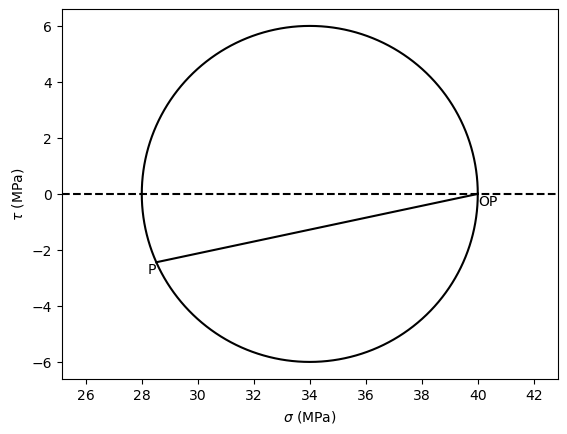

In [4]:
# sigma_1, sigma_3 and fault dip
sigma_1 = 40
sigma_3 = 28
dip = np.radians(12)

# Mohr Circle
center_x = (sigma_1 + sigma_3) / 2
radius = (sigma_1 - sigma_3) / 2
circle = Circle([center_x, 0], radius)
x, y = circle.coordinates()

# tractions on fault plane
# OP is at sigma_1
OP = [sigma_1, 0]
P = circle.chord_endpoint(OP, (np.pi + dip))
chord_p = np.array([OP, P])
print(f"Shear traction on fault is {P[1]:.1f} MPa")

# plot Mohr Circle
fig, ax = plt.subplots()
ax.plot(x, y, "k")
ax.text(center_x+radius, 0, "OP", ha="left", va="top")
ax.plot(chord_p[:,0],chord_p[:,1],"k-")
ax.text(P[0], P[1], "P", ha="right", va="top")
ax.axhline(0,color="k",linestyle="--")
# axes labels
ax.set_xlabel(r"$\sigma$ (MPa)")
ax.set_ylabel(r"$\tau$ (MPa)")
# axes equal
ax.axis("equal")

plt.show()

So, the shear traction on the fault is just 2.4 MPa. Stress components are not force vectors.